I've created a helper function to retreive bing images to make our lives a bit easier.
Now we can use this function to get the images we want.

In [64]:
import math
import requests
def search_bing_images(key, term, count=150):
    subscription_key = key
    search_url = 'https://api.bing.microsoft.com/v7.0/images/search'
    search_term = term
    headers  = {"Ocp-Apim-Subscription-Key":subscription_key}
    
    total = []
    
    if(count>150):
        rest = count
        amount = math.ceil(count/150)
        for i in range(amount):
            params = {"q":search_term, 'mkt':'en-US', 'count': 150 if rest>150 else rest, 'offset':i*150, "license":"public", "imageType":"photo"}
            rest-=150
            response = requests.get(search_url, headers=headers, params=params)
            response.raise_for_status()
            search_results = response.json()
            thumbnails = [img['thumbnailUrl'] for img in search_results['value']]
            total.extend(thumbnails)
    else:
        params = {"q":search_term,'mkt':'en-US', 'count':count , "license":"public", "imageType":"photo"}
        response = requests.get(search_url, headers=headers, params=params)
        response.raise_for_status()
        search_results = response.json()
        thumbnails = [img['thumbnailUrl'] for img in search_results['value']]
        total = thumbnails
        
    return total

Use the helper function to retreive 100 van gogh images. 

In [3]:
van_gogh_images = search_bing_images('API-KEY', 'van gogh paintings', count=100)

In [5]:
from fastai.vision.all import *

Download the images to a folder. Temp folder atm -> resources/van-gogh

In [9]:
download_images('resources/van-gogh', urls=van_gogh_images, n_workers=1) #n_workers = 1 because microsoft :( 

Now we can read the files

In [10]:
images = get_image_files('./resources/van-gogh')

And print them 😊

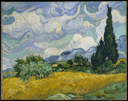

In [12]:
im = Image.open(images[0])
im.to_thumb(128,128)

Now let's repeat the process for other painters but let's automate the process because I'm lazy 😁

In [86]:
painters = ['van gogh', 'da vinci', 'cezanne', 'monet', 'dali', 'picasso']

In [87]:
def download_paintings(painters):  
    for painter in painters:      
        print(f'Downloading {painter}')
        path = 'resources/'+ '-'.join(painter.split())
        query = painter + ' paintings'
        urls = search_bing_images('API_KEY', query)
        download_images(path, urls=urls, n_workers=1)
        print(f'Finished {painter}')

In [88]:
download_paintings(painters)

Finished van gogh


Finished da vinci


Finished cezanne


Finished monet


Finished dali


Finished picasso
